(342, 13) (342,)
w =  [-0.41868538 -0.01693036 -0.22573421  0.21648202 -0.60338711  3.12229896
 -0.83901286 -1.44627897  0.28831035 -0.43964835 -1.70095314  0.99827074
 -2.47241042]
b =  21.76783625730995
w2=  [-0.45315441  0.21846332 -0.29236715  0.19003637 -0.34567819  2.97027853
 -0.41060031 -1.12176281  0.37806476 -0.60421715 -1.53337432  0.88350472
 -2.4555508 ]
b2=  [21.17111005]
R_Square1 0.7844866446778563
R_Square2 0.7759992586284021
predict_a1= [241.85394439]
predict_a2= [169.60163902]
(147, 13)
error1= 0.14375147616237685
error2= 0.13992221255914475


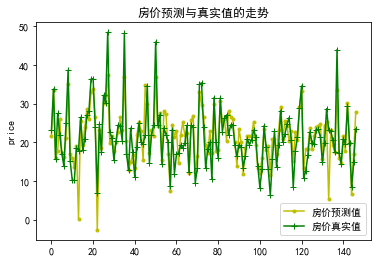

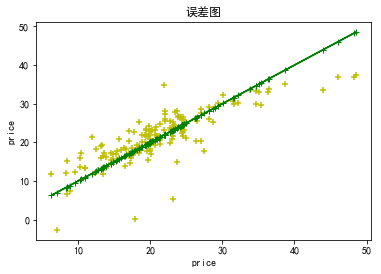

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,SGDRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

def dataSet(data):
    data=np.array(data)
    features =data[:,:-1] #取出所以数据的前十三项作为特征值
    price = data[:,-1]  #取出数据的最后一项作为房价价格
    #对数据集进行训练集和测试集分割，训练集占70%，测试集占30%
    features_train,features_test,price_train,price_test=train_test_split(features,price,test_size=0.3,random_state=0)
    print(features_train.shape,price_train.shape)
    return features,price,features_train,features_test,price_train,price_test

#房价走势图 
def show1(price_test,predict_price):
    x=range(len(predict_price))
    plt.plot(x,predict_price,color='y', marker='.')
    plt.plot(x,price_test,color='g', marker='+')
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False #属性配置,用来解决图表中显示不出中文的情况
    plt.ylabel('price')
    plt.legend(['房价预测值','房价真实值'])
    plt.title('房价预测与真实值的走势')
    plt.show()

#模型可视化，用于评估预测价格与真实价格之间的误差，黄色点越接近绿色直线，说明预测价格更接近真实价格     
def show2(price_test,predict_price):
    plt.scatter( price_test,predict_price,color='y',marker='+')
    plt.plot(price_test,price_test,color='g', marker='+')
    plt.xlabel('price')
    plt.ylabel('price')
    plt.title('误差图')
    plt.show()
       
#导入线性回归模型训练数据集
data = pd.DataFrame(pd.read_excel('data.xls'))    
features,price,features_train,features_test,price_train,price_test=train_test_split=dataSet(data)

#print(features)



#特征工程，标准化
# 1.创建一个转换器
transfer = StandardScaler()
# 2.数据标准化
features_train = transfer.fit_transform(features_train)
features_test = transfer.transform(features_test)



# 方法一：正规方程求解
clf1= linear_model.LinearRegression()
clf1.fit(features_train,price_train)
#计算线性回归模型的斜率，总共有十三个features，所以求出的斜率有十三个，即y=x1*b1+x2*b2---x13*b13
w = clf1.coef_
print("w = ",w)
b = clf1.intercept_  #线性回归模型计算截距值
print("b = ",b)

# 方法二：梯度下降求解
clf2=SGDRegressor()
clf2.fit(features_train,price_train)
w2= clf2.coef_
print("w2= ",w2)
b2=clf2.intercept_  #线性回归模型计算截距值
print("b2= ",b2)


#使用r2_score模块，并输出评估结果
R_Square1= clf1.score(features_train,price_train) #判定系数R-Square,即描述模型和数据的拟合程度
print("R_Square1",R_Square1)
R_Square2= clf2.score(features_train,price_train)
print("R_Square2",R_Square2)



#使用features测试price，这里只列举了一个样本的特征进行价格的预测
a=[[0.08187,0,2.89,0,0.445,7.82,36.9,3.4952,2,276,18,393.53,3.57]]
#price_a=41.1
predict_a1=clf1.predict(a)
predict_a2=clf2.predict(a)
print("predict_a1=",predict_a1)
print("predict_a2=",predict_a2)


#使用测试集评估模型,首先输入测试集features，得到预测的price
print(features_test.shape)
predict_price1= clf1.predict(features_test)

predict_price2= clf2.predict(features_test)

list(predict_price1)  #预测价格生成列表
list(predict_price2) 
#print(predict_price1.shape)
#print(predict_price2)

error_sum1=sum(np.sqrt((price_test-predict_price1)**2)) #求解预测price与真实price之间的误差总和
price_test_sum =sum(price_test)
error1=error_sum1/price_test_sum  
print("error1=",error1)

error_sum2=sum(np.sqrt((price_test-predict_price2)**2)) #求解预测price与真实price之间的误差总和
price_test_sum =sum(price_test)
error2=error_sum2/price_test_sum  
print("error2=",error2)

show1(price_test,predict_price1)
show2(price_test,predict_price1)